# **PCA and t-SNE Project: Auto MPG**

# ****

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [5]:
data = pd.read_csv("auto-mpg.csv")

In [6]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Checking the info of the data**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking the unique values in the 'car name' column**

In [8]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [9]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [10]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column. 
- First, we need to **replace the ? with np.nan**.

In [11]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [12]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

### **Summary Statistics**

### **Question 1:** 
- **Check the summary statistics of the data (use the describe function)**
- **Write your observations**

In [13]:
# Write your code here

data.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Observations:
-The sandard deviation is high in mpg 7.8, and displacement 104.2.   
-mpg: The number of mean and 50%(median) are close. They are 23.514573 and 23.0 respectively. The range between min and max is wide as 9 and 46.6 respectively.   
-displacement:The number of mean and 50%(median) are 193.425879 and 148.5 respectively.   
-horsepower: horsepower has a mean with 104.30. And the difference between min 46 and max 230 is high. There is probably outliers.   
-acceleration:The number of mean and 50%(median) are close. They are 15.568090 and 15.5 respectively. That means this may close to normal dostribution.  The std is low as 2.75. But the range between min and max is pretty high, 8 and 24.8 respectively. Maybe ourliers are existing.  
-model year: The number of mean and 50%(median) are close. They are 76.010050 and 76.0 respectively. That means this may close to normal dostribution. The min is 70 and the max is 82. So, there is for 13 years data.  
**

### **Let's check the distribution and outliers for each column in the data**

### **Question 2:**
- **Create histograms to check the distribution of all the variables (use .hist() attribute) **
- **Create boxplots to visualize the outliers for all the variables (use sns.boxplot()) **
- **Write your observations **

mpg
Skew : 0.46


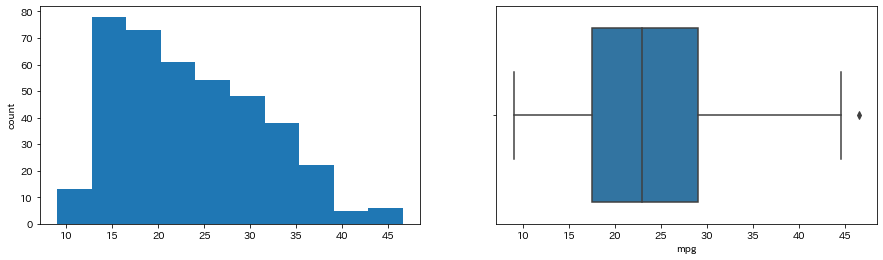

cylinders
Skew : 0.53


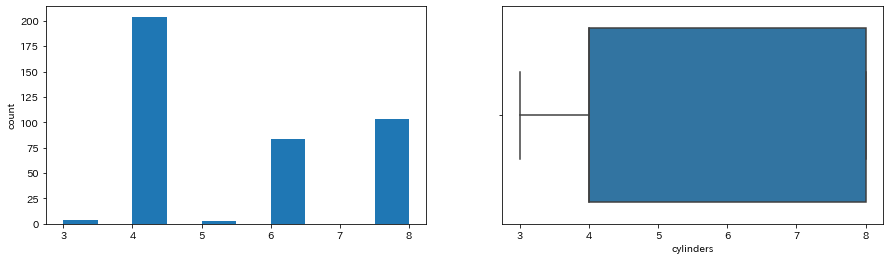

displacement
Skew : 0.72


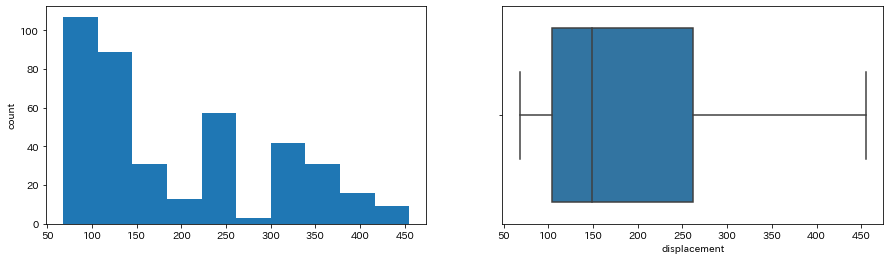

horsepower
Skew : 1.11


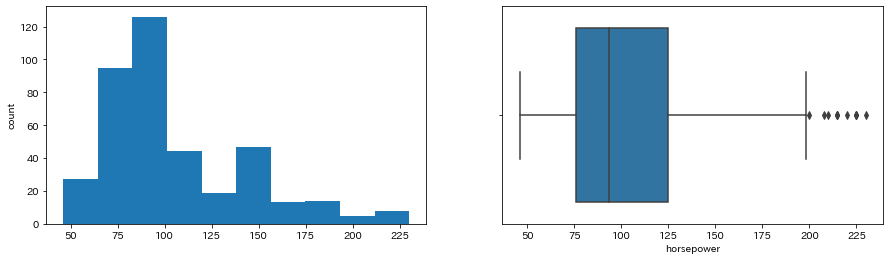

weight
Skew : 0.53


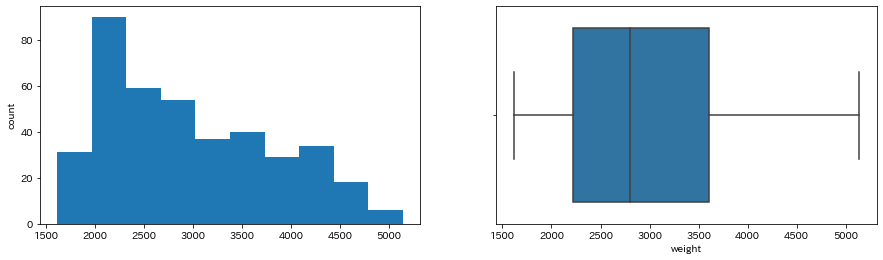

acceleration
Skew : 0.28


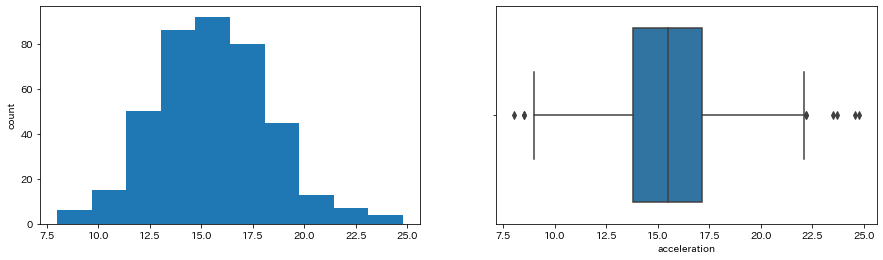

model year
Skew : 0.01


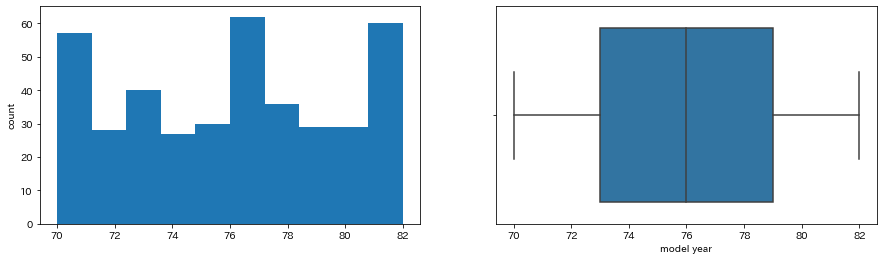

In [14]:
# Complete the below code by filling the blanks, before running this cell, to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:   
-mpg, displacement, horsepower, and weight have unique distribution plots. When we check the boxplots, they are located right side of the plots. mpg and horsepower have some outliers. On the ther hand, displacement and weight don't have outliers.  
-cylinders: There is random in the distribution plot. But it stays kind of left side in the boxplot.  
-acceleration:In the distribution plot, this is very close to normal distribution the I can see a almost symmetric bell curve. The center is the highest point. In the boxplot, it stays in the middle and there are some outliers.  
-model year: There is random in the distribution plot. But it stays in the middle in the boxplot.  
**

### **Checking the correlation**

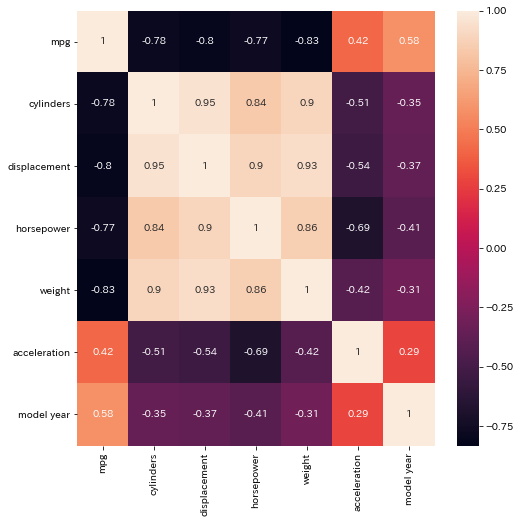

In [15]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True)

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [16]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [17]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

### **Question 3:**

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data **
- **Write your observations on the variance explained by the principal components**

In [18]:
# Defining the number of principal components to generate 
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)  # Apply the PCA algorithm with random_state = 1

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))   # Fit and transform the pca function on scaled data

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

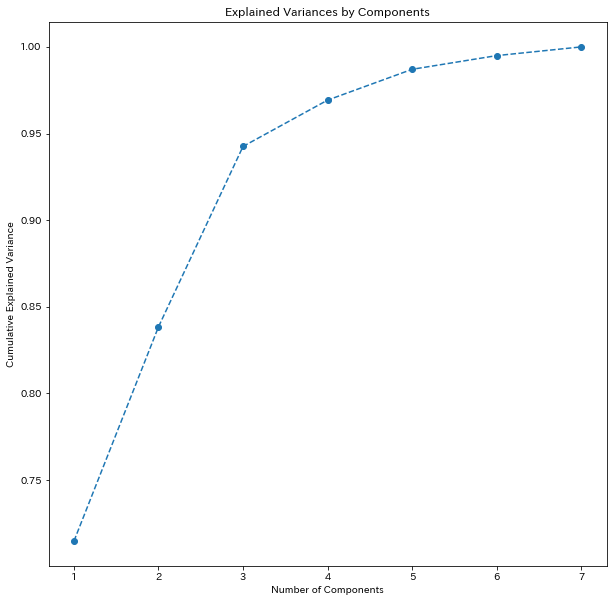

In [19]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [20]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:Originally, there were 7 variables there before(I am saying after dropping the car name). After applying PCA, it is reduced to 3 prinpal components from 7. The first 3 principal components can explain at least 90% of the original variance.  So, there is about 57% reduction in the dimensionality of this dataset. And a loss of the variance is only 10%.   
**

In [21]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


### **Question 4: Interpret the coefficients of the first three principal components from the below DataFrame **

In [22]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'
    
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:
Each principle component is a linear combination of the original features.  
The below is the equation of PC1.  

PC1 = -0.4 mpg + 0.42 Cylinders + 0.43 displacement + 0.42 horsepower + 0.41 weight - 0.28 acceleration - 0.23 * model year  

The first two principal components can explain around 84% of the variability in this dataset.
**

#### We can also visualize the data in 2 dimensions using the first two principal components 

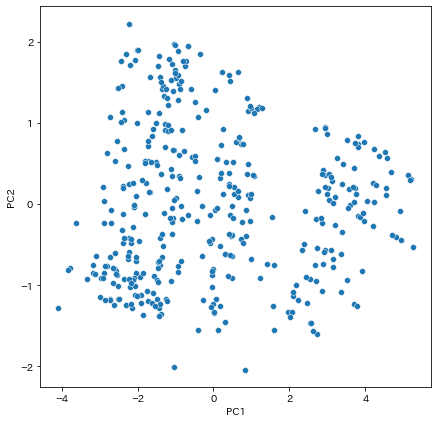

In [23]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Let's try adding hue to the scatter plot**

### **Question 5:** 

- **Create a scatter plot for the first two principal components with hue = 'cylinders' ** 
- **Write your observations on the plot **
- **Hint:** concatenate the DataFrames 'data_pca1' and 'data' on axis = 1

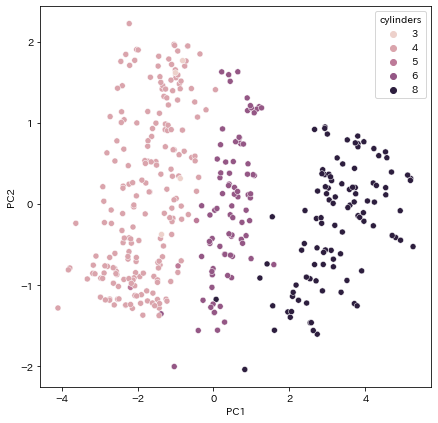

In [28]:
df_concat = pd.concat([data_pca1, data], axis = 1)

plt.figure(figsize = (7, 7))

sns.scatterplot(x = df_concat[0], y = df_concat[1], hue = data.cylinders)   # Create a scatter plot with x = 0 and y = 1 using df_concat dataframe

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:
We can see PC1 and PC2 explain most of the variation in the data.  There are 3 different kinds of clusters in the plot.  
**

## t-SNE

### **Question 6:** 
- **Apply the t-SNE embedding with 2 components for the DataFrame 'data_scaled' (use random_state = 1) **
- **Write your observations **   

In [29]:
tsne = TSNE(n_components = 2, random_state = 1)           # Apply the t-SNE algorithm with random_state = 1

data_tsne = tsne.fit_transform(data_scaled)    # Fit and transform t-SNE function on the scaled data

In [30]:
data_tsne.shape

(398, 2)

In [31]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [32]:
data_tsne.head()

,Component 1,Component 2
0,-38.088413,-15.912958
1,-37.404369,-17.995850
2,-38.050472,-17.063194
3,-37.718334,-16.476006
4,-38.404663,-16.763493


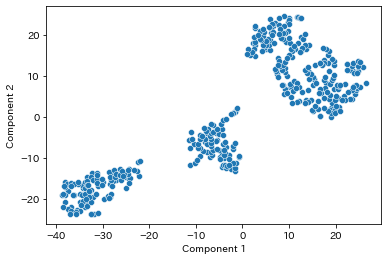

In [33]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

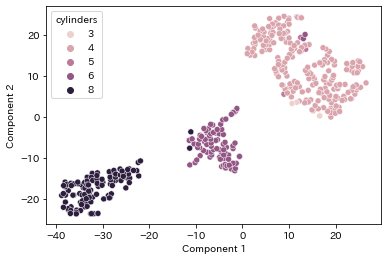

In [34]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

**Observations:
Using the function of cylinders, there are 3 different kinds of clusters. But a few of dots are located in the different cluster. This result is similar to PCA's one that we tried earlier. T-sne created 2 components from 7 features originally. 
**

In [35]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    
    second_component = x['Component 2']
    
    if (first_component > 0) and (second_component > -5): 
        return 'group_1'
    
    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'
    
    else: 
        return 'group_3'

In [36]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

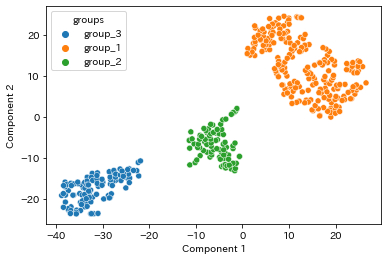

In [37]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [38]:
data['groups'] = data_tsne['groups'] 

### **Question 7:** 
- **Complete the following code by filling the blanks **
- **Write your observations on different groups w.r.t different variables **

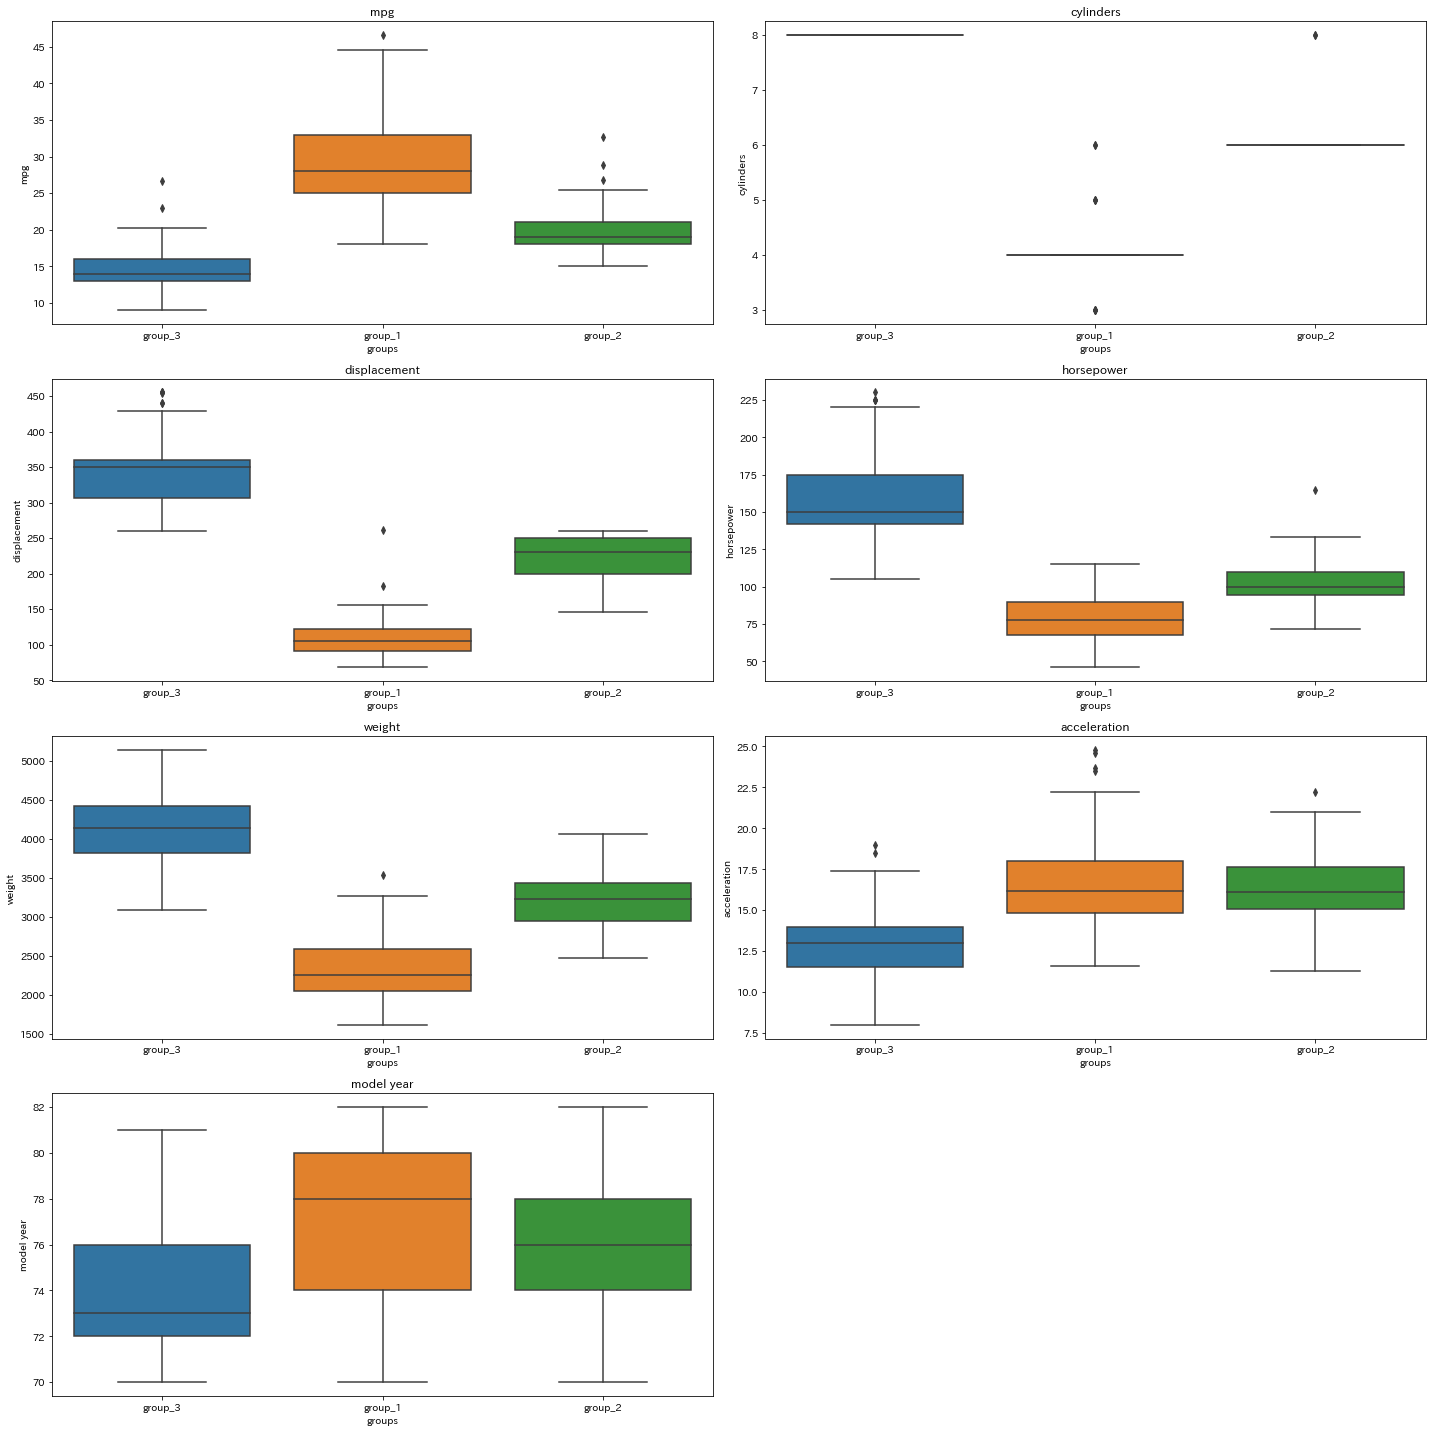

In [39]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col): 
    if i == 7:
        break
    
    plt.subplot(4, 2, i + 1)
    
    sns.boxplot(y=data[variable], x=data['groups'])      # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:
In the T-sne, there are 3 clusters with 2 components. In the boxplot, we see 3 groups. Please let me explain each specific characteristics.  

Group1 explains contemporaly cars than other groups. MPG is high compared to others. Their model year is relatively new. The weight is light compared to other groups. Acceleration is almost same as Group 2. It is low displacement, horsepower, and cylinders.    

Group2 is between Group1 and Group3. (Group1 is modern car while Group 3 is old era's car.) MPG, displacement, horsepower.  weight, cylinders, model year are between Group1 and Group3. As I mentioned in the section of Group1, the accelation is about similar to Group1. I assume the reason of the same performance of acceleration with Group1 and Group2 is because the function and performance were already standarlized around of the era between the 2 groups.   

Group3 shows the oldest era's car group amoung this data set. The characteristics are low MPG, high displacement, high horsepower, heavy weight, a lot of cylinders, low acceleration, and old model year.   

**